In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 50) 
pd.set_option('display.max_rows', 50) 
pd.options.display.max_colwidth = 100

In [2]:
df = pd.read_csv('https://s3-us-west-1.amazonaws.com/epicactuaryhealth/members.csv')
df1 = pd.read_csv('https://s3-us-west-1.amazonaws.com/epicactuaryhealth/conditions.csv')

In [3]:
df1['prev_dx'].value_counts()

172.9    300000
897.2    300000
268.9    300000
897.6    300000
Name: prev_dx, dtype: int64

In [4]:
df1.prev_dx = df1.prev_dx.astype(str)
dfnew = df1.groupby('ID')['prev_dx'].apply(','.join).reset_index()

In [5]:
dfnew['prev_dx'].value_counts()

897.6          200000
268.9          200000
172.9          200000
897.2          200000
172.9,268.9    100000
897.6,897.2    100000
Name: prev_dx, dtype: int64

In [6]:
conditions = [
    (dfnew['prev_dx'] == '268.9') ,
    (dfnew['prev_dx'] == '172.9') ,
    (dfnew['prev_dx'] == '897.2') ,
    (dfnew['prev_dx'] == '897.6') ,
    (dfnew['prev_dx'] == '172.9,268.9' ) ,
    (dfnew['prev_dx'] == '897.6,897.2')]
choices = [3.5,6.5,3,4,11.5,4]
dfnew['cost'] = np.select(conditions, choices, default=np.nan)

In [73]:
dfnew["v_flag"] = (dfnew['prev_dx'] == '268.9') | (dfnew['prev_dx'] == '172.9') | (dfnew['prev_dx'] == '172.9,268.9')
dfnew.v_flag = dfnew.v_flag.astype(int)
dfnew['v_flag'].value_counts()

1    500000
0    500000
Name: v_flag, dtype: int64

In [76]:
dfnew.groupby('v_flag').sum().reset_index()

,v_flag,ID,cost
0,0,875000250000,1800000.0
1,1,375000250000,3150000.0


In [11]:
(3150000 - 1800000) * 10000

13500000000

In [13]:
df.head()

,ID,act_cost,v_flag
0,1,4539.848486,1
1,2,5058.500075,1
2,3,5820.403715,1
3,4,4435.088301,1
4,5,4926.160677,1


In [19]:
df.groupby('v_flag').sum().reset_index()

,v_flag,ID,act_cost
0,0,1500000500000,2.098881e+10
1,1,500000500000,1.345542e+10


In [22]:
13455420000 - 20988810000 

-7533390000

In [23]:
df['v_flag'].value_counts()

1    1000000
0    1000000
Name: v_flag, dtype: int64

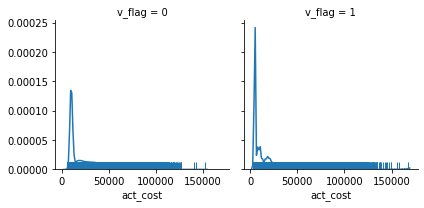

In [28]:
g = sns.FacetGrid(df, col='v_flag', palette="Set1")
g = (g.map(sns.distplot, "act_cost", hist=False, rug=True))

In [31]:
error = abs((3150000 * 10000 - 13455420000)) / 13455420000

In [32]:
error

1.3410640470531578

In [66]:
dfnew1 = pd.read_csv('https://s3-us-west-1.amazonaws.com/epicactuaryhealth/conditions.csv')

In [67]:
dfnew1.prev_dx = df1.prev_dx.astype(str)
dfnew2 = dfnew1.groupby('ID')['prev_dx'].apply(','.join).reset_index()
dfnew2

,ID,prev_dx
0,500001,268.9
1,500002,268.9
2,500003,268.9
3,500004,268.9
4,500005,268.9
...,...,...
999995,1999996,"897.6,897.2"
999996,1999997,"897.6,897.2"
999997,1999998,"897.6,897.2"
999998,1999999,"897.6,897.2"


In [68]:
conditions = [
    (dfnew2['prev_dx'] == '268.9') ,
    (dfnew2['prev_dx'] == '172.9') ,
    (dfnew2['prev_dx'] == '897.2') ,
    (dfnew2['prev_dx'] == '897.6') ,
    (dfnew2['prev_dx'] == '172.9,268.9' ) ,
    (dfnew2['prev_dx'] == '897.6,897.2')]
choices = [3,4,3,5,13,11.5]
dfnew2['new_score'] = np.select(conditions, choices, default=np.nan)

In [63]:
dfnew2["v_flag"] = (dfnew2['prev_dx'] == '268.9') | (dfnew2['prev_dx'] == '172.9') | (dfnew2['prev_dx'] == '172.9,268.9')
dfnew2.v_flag = dfnew2.v_flag.astype(int)
dfnew2.groupby('v_flag').sum().reset_index()

,v_flag,ID,cost
0,0,875000250000,2750000.0
1,1,375000250000,2700000.0


In [47]:
(2150000- 2550000) * 10000

-4000000000

In [64]:
error = abs((2700000 * 10000 - 13455420000)) / 13455420000
error

1.006626326045564

In [69]:
dfnew2

,ID,prev_dx,new_score
0,500001,268.9,3.0
1,500002,268.9,3.0
2,500003,268.9,3.0
3,500004,268.9,3.0
4,500005,268.9,3.0
...,...,...,...
999995,1999996,"897.6,897.2",11.5
999996,1999997,"897.6,897.2",11.5
999997,1999998,"897.6,897.2",11.5
999998,1999999,"897.6,897.2",11.5


In [70]:
dfnew2.to_csv("current_score.csv")